<a href="https://colab.research.google.com/github/3ndung/H8_PTP_Final_Image/blob/master/CatDog_Classification.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#CATS AND DOGS IMAGE CLASSIFICATION**





---

Sebagai tugas akhir kelas machine learning 

################################################################################

**Add DatastetFrom Kaggle dana atau google dataset**

---


if needed,

Karena Dataset yang digunakan berukuran besar, ada baiknya dataset tersebut tidak didownload ke local data, tapi diDownload ke cloud saja


Jika Menggunakan Kaggle , dapat memanfaatkan kaggle API

In [0]:
! mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 35.1MB/s]
 98% 266M/271M [00:06<00:00, 59.7MB/s]
100% 271M/271M [00:06<00:00, 43.9MB/s]
 99% 536M/543M [00:10<00:00, 63.1MB/s]
100% 543M/543M [00:10<00:00, 55.5MB/s]


**Atau Download Datasetnya dari google seperti code dibawah**

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('train.zip', 'r') as zipObj:

   zipObj.extractall('train')


with ZipFile('test1.zip', 'r') as zipObj:

   zipObj.extractall('test')   

# **Import Tensorflow & Library Pendukung lainya**

In [8]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [9]:
tf.__version__

'2.1.0'

In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Load Dataset from Google drive *if needed

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Create New Train & Test dataset if needed
klo dataset dirasa kurang

# Inisialisai Ukuran Image 

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
filenames = os.listdir("train/train/")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

       

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [16]:
df.head(10)

,filename,category
0,dog.2382.jpg,1
1,dog.2111.jpg,1
2,cat.2300.jpg,0
3,cat.10246.jpg,0
4,cat.5213.jpg,0
5,dog.650.jpg,1
6,dog.11756.jpg,1
7,cat.10007.jpg,0
8,dog.12287.jpg,1
9,cat.2334.jpg,0


In [17]:
df.tail(10)

,filename,category
24990,dog.8195.jpg,1
24991,cat.11645.jpg,0
24992,dog.7537.jpg,1
24993,cat.9094.jpg,0
24994,cat.2829.jpg,0
24995,dog.9698.jpg,1
24996,dog.512.jpg,1
24997,cat.9977.jpg,0
24998,cat.8540.jpg,0
24999,dog.9593.jpg,1


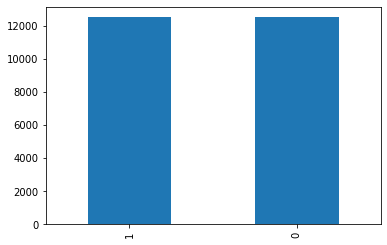

In [18]:
df['category'].value_counts().plot.bar()

# PATH Directory Dataset untuk Training/Learning

In [0]:
PTH = 'train/train/'

Sample Imange


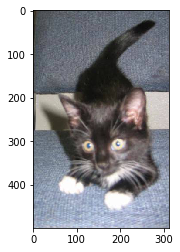

In [22]:
import random

sample = random.choice(filenames)
image = tf.keras.preprocessing.image.load_img(PTH+sample)
plt.imshow(image)

# **Model Architectire Dengan 3 Block Convo**

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
    
    
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# **Reduce Learning Rate ON Plateu**

Jadi pada model learning rate ini kita menggunakan feature ReduceLROnPlateau dengan tujuan salah satunya adalah mengindari saturasi pada optimizer dengan cara menurunkan Learning Rate , sehingga tampak validasi accuracy akan lebih kecil dibanding sebelumnya


dan pada grafik validasi tampak terlihat pada beberapa spike


In [0]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

# **Membagi Data untuk Test & Train**

Membagi Data untuk Test & Train dengan menggunakan feature train_test_split dari library sklearn,

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

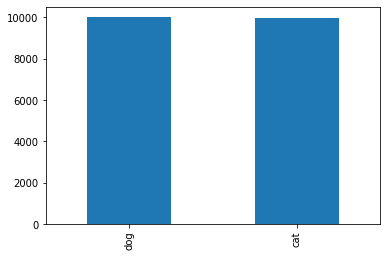

In [30]:
train_df['category'].value_counts().plot.bar()

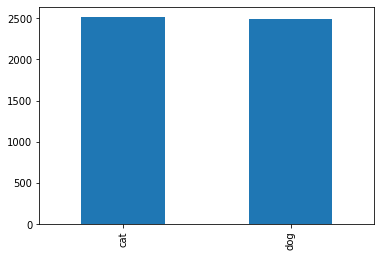

In [29]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# *Augmentasi *

Untuk menghindari data yang overfit dan juga memperbaiki akurasi

In [32]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [33]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [34]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


# Sample Image hasil Augmentasi

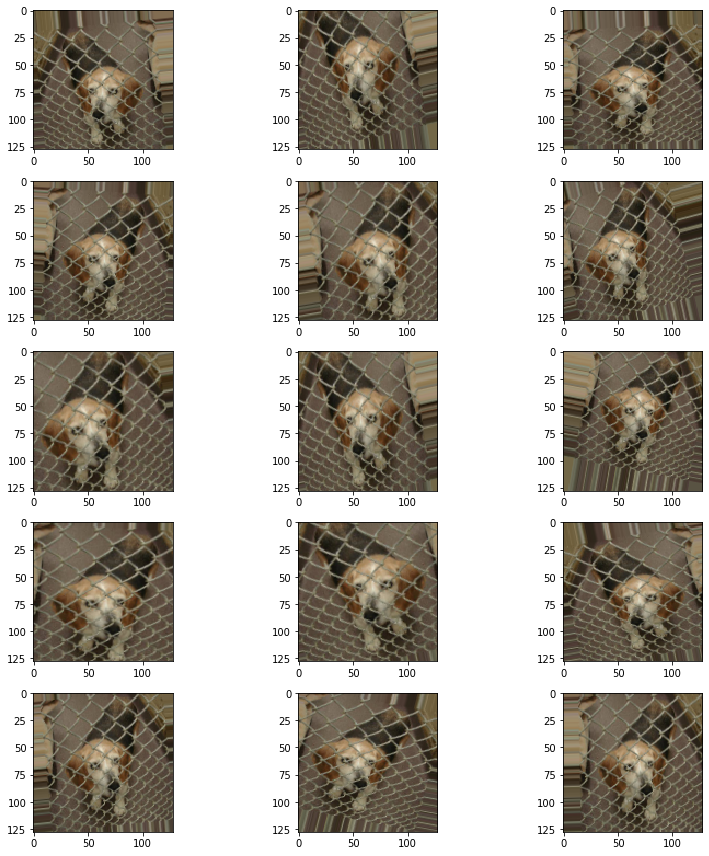

In [35]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [36]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 50,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/50
1333/1333 [==============================] - 156s 117ms/step - loss: 0.6967 - accuracy: 0.5356 - val_loss: 0.6892 - val_accuracy: 0.5115
Epoch 2/50
1333/1333 [==============================] - 149s 112ms/step - loss: 0.6651 - accuracy: 0.5911 - val_loss: 0.6282 - val_accuracy: 0.6382
Epoch 3/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.6249 - accuracy: 0.6493 - val_loss: 0.5957 - val_accuracy: 0.6811
Epoch 4/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5773 - accuracy: 0.6973 - val_loss: 0.5075 - val_accuracy: 0.7542
Epoch 5/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5426 - accuracy: 0.7249 - val_loss: 0.4920 - val_accuracy: 0.7602
Epoch 6/50
1333/1333 [==============================] - 150s 112ms/step - loss: 0.5189 - 

# SAVE MODEL

In [0]:
model.save('MODEL_BAGUS_13022020_valacc_08865.h5')

# **Plotting Learning & Training **

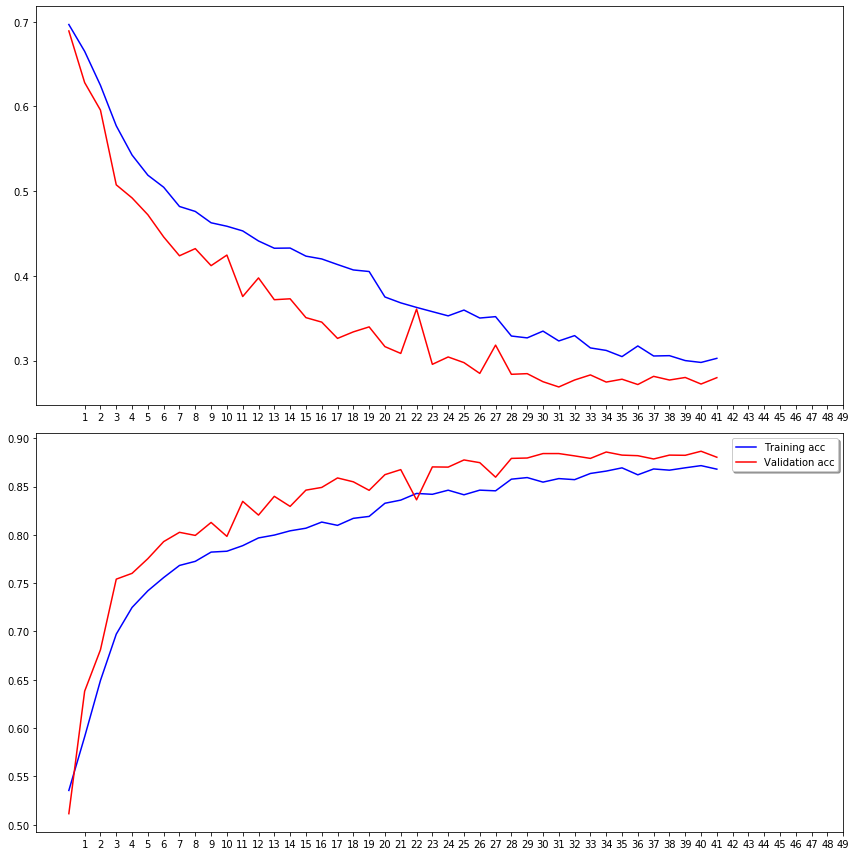

In [38]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Re-Continue Training/Learning

pada Tensorflow ada feature menlanjutkan dari model terakir, cara ini bisa digunakan untuk mencacah proses pembelajaran dan pengaturan memori resource

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3667 - accuracy: 0.8363 - val_loss: 0.3884 - val_accuracy: 0.8288
Epoch 2/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3694 - accuracy: 0.8354 - val_loss: 0.4025 - val_accuracy: 0.8240
Epoch 3/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3626 - accuracy: 0.8369 - val_loss: 0.3889 - val_accuracy: 0.8296
Epoch 4/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3642 - accuracy: 0.8351 - val_loss: 0.3936 - val_accuracy: 0.8286
Epoch 5/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3708 - accuracy: 0.8340 - val_loss: 0.3980 - val_accuracy: 0.8270


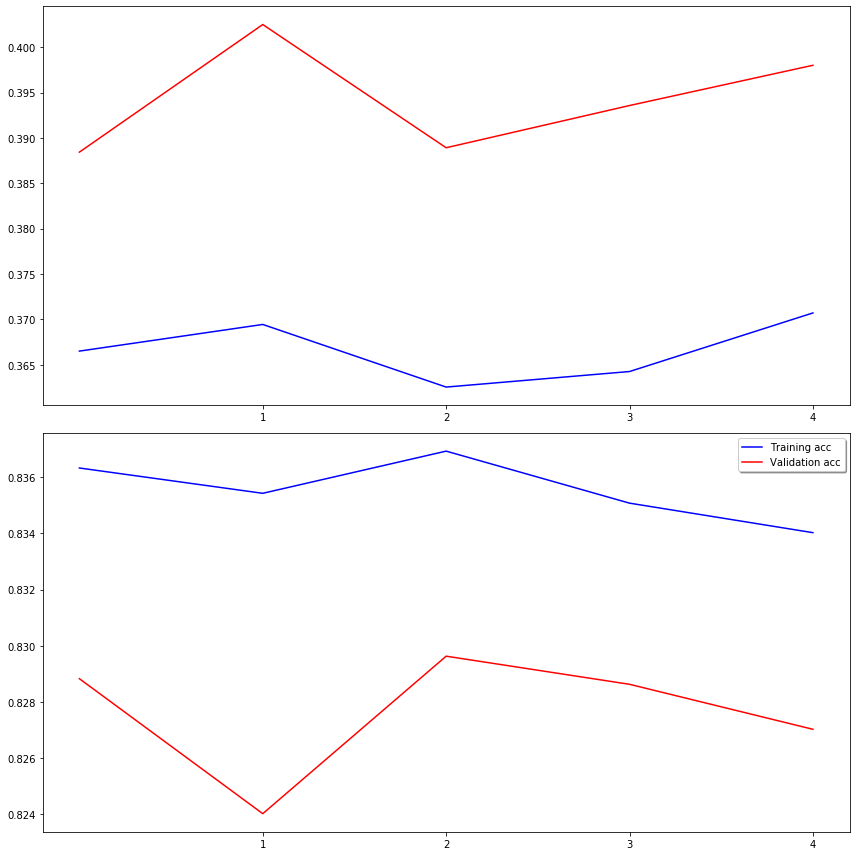

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

epochs=5
ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# TEBAK TEBAK GAMBAR TIDAK BERHADIAH

**fungsi Prediksi**

In [0]:
def prediksi_semua(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

# RANDOM PREDIKSI TEST IMAGE KOECENG APA ANJENG :D

 IMAGE ---->> 2209.jpg


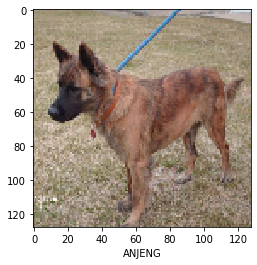

In [40]:
PTHC = 'test/test1/'
sample = random.choice(os.listdir(PTHC))

print(' IMAGE ---->> {}'.format(sample))

A = 'test/test1/{}'.format(sample)
#B = 'test/test1/10007.jpg'


prediksi_semua(A)
      

# Tebak Tebak Gambar di Inet

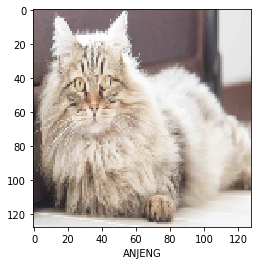

In [41]:
import urllib.request as req
import random

A ='https://cdn.shopify.com/s/files/1/0997/4496/files/Screen_Shot_2018-08-28_at_3.11.32_PM_grande.png?v=1535494311'

f = open('IMG_FROM_URL.jpg','wb')
f.write(req.urlopen(A).read())
f.close()

prediksi_semua('IMG_FROM_URL.jpg')

# **Prediksi Dengan menggunakan Model**

In [0]:
model_load = tf.keras.models.load_model('MODEL_BAGUS_13022020_valacc_0829.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

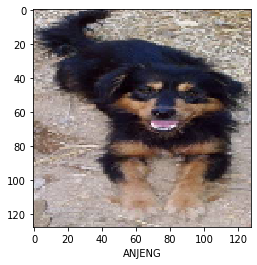

In [0]:
prediksi_Dengan_Model(A)